# Utility Usage Report

When adding new readings, please see the relevant CSVs in this directory.


## Set Up
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import enum
from IPython.core.display import display, HTML

class Utility(enum.Enum):
    Water = 'water'
    Electricity = 'electricity'
    Gas = 'gas'

def get_readings(utility):
    readings = pd.read_csv('{}_readings.csv'.format(utility.value))
    readings['Date'] = pd.to_datetime(readings['Date'], format='%d/%m/%Y')
    return readings

def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    
    for caption, df in combined.items():
        output += df.style\
            .set_table_attributes("style='display:inline'")\
            .set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
        
    display(HTML(output))
    
def get_average_usage_per_day_since_last_reading(meter_readings):
    reading_diff = meter_readings.diff()
    df = pd.DataFrame()
    df['Date'] = meter_readings['Date'].copy()
    df['Usage Since Last Reading'] = reading_diff.iloc[:,1] / reading_diff.iloc[:,0].dt.days
    return df


## Readings
---

In [2]:
water_readings = get_readings(Utility.Water)
electricity_readings = get_readings(Utility.Electricity)
gas_readings = get_readings(Utility.Gas)

display_side_by_side(
    [water_readings, electricity_readings, gas_readings], 
    map(lambda x: '{} Readings'.format(x.name), list(Utility)))

,Date,Reading (m3)
0,2020-08-15 00:00:00,784
1,2020-08-28 00:00:00,796
2,2020-10-17 00:00:00,806
3,2020-11-01 00:00:00,809
4,2020-12-01 00:00:00,814
,Date,Reading (kWh)
0,2020-08-15 00:00:00,33054
1,2020-09-21 00:00:00,33284
2,2020-09-27 00:00:00,33319
3,2020-11-01 00:00:00,33589


## Usage, Costs, and Predictions
---
TODO LIST
 - Show usage since last reading (if using graph, make sure y-axis is scaled well)
 - Give percentage increase
 - Calculate cost

### Water

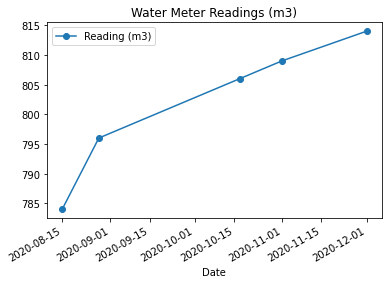

In [3]:
water_readings.plot(x=0, y=1, style='o-', title='Water Meter Readings (m3)')
plt.show()

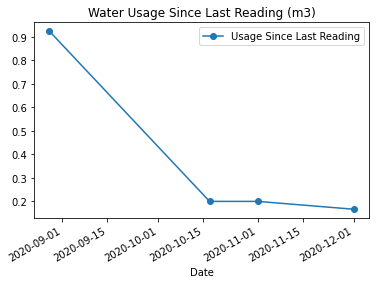

In [4]:
water_usage_since = get_average_usage_per_day_since_last_reading(water_readings)
water_usage_since.plot(x=0, y=1, style='o-', title='Water Usage Since Last Reading (m3)')
plt.show()

### Electricity

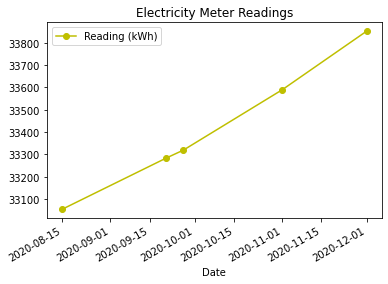

In [5]:
electricity_readings.plot(x=0, y=1, style='o-y', title='Electricity Meter Readings')
plt.show()

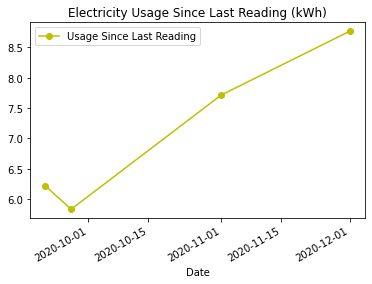

In [6]:
electricity_usage_since = get_average_usage_per_day_since_last_reading(electricity_readings)
electricity_usage_since.plot(x=0, y=1, style='o-y', title='Electricity Usage Since Last Reading (kWh)')
plt.show()

### Gas

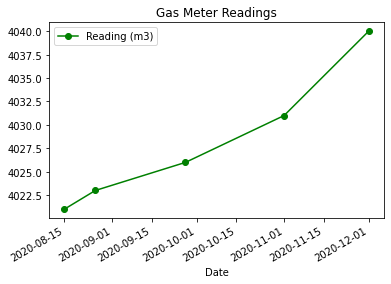

In [7]:
gas_readings.plot(x=0, y=1, style='o-g', title='Gas Meter Readings')
plt.show()

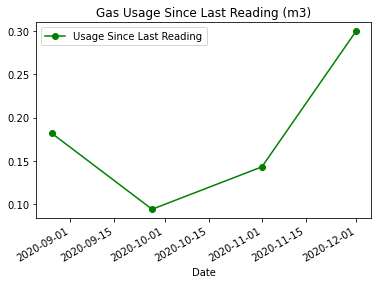

In [8]:
gas_usage_since = get_average_usage_per_day_since_last_reading(gas_readings)
gas_usage_since.plot(x=0, y=1, style='o-g', title='Gas Usage Since Last Reading (m3)')
plt.show()